<a href="https://colab.research.google.com/github/ccopenh1/3162-final-project/blob/main/3162_Final_Project_Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ccopenh1/3162-final-project.git


Cloning into '3162-final-project'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 159.36 KiB | 1.15 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
%cd 3162-final-project


/content/3162-final-project


In [ ]:
# Code to import talib, run before setup
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb -qO'
!wget $url/libta-lib0_$ext libta.deb
!wget $url/ta-lib0-dev_$ext ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

Selecting previously unselected package libta-lib0.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

     ━━━━━━━━

In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For building linear regression models
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance
import talib # For our RSI feature in Experiment 2


In [ ]:
df = pd.read_csv('Stock Market Dataset.csv')

In [ ]:
df.to_csv('Stock Market Dataset.csv', index=False)

In [ ]:
!git pull

Already up to date.


# DATASET:https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data/data

# INTRODUCTION


In today's financial landscape, accurate predictions of stock market prices are crucial for investors to make informed decisions and optimize their portfolios. As aspiring data scientists, we recognize the significance of leveraging regression techniques to forecast stock prices. Our project aims to develop regression models that can effectively predict stock market prices based on historical data. By analyzing various features and market indicators, we seek to provide valuable insights that aid investors in navigating the dynamic stock market environment.


# ABOUT THE DATA

Data: https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data/data

The dataset we will utilize for our project is sourced from an extensive examination of market dynamics spanning a five-year period, with 425.48 kB of data in 39 columns. This comprehensive dataset encompasses a wide range of market sectors, including energy commodities such as natural gas and crude oil, metals like copper, platinum, silver, and gold, cryptocurrencies including Bitcoin and Ethereum, and key stock indices and companies like the S&P 500, Nasdaq 100, Apple, Tesla, Microsoft, Google, Nvidia, Berkshire Hathaway, Netflix, Amazon, and Meta Platforms. It serves as a valuable resource for analyzing trends and patterns in global markets, offering insights into price fluctuations and trading volumes across a diverse portfolio. The dataset comprises detailed information on various market parameters, including: Date: Recorded data formatted as DD-MM-YYYY. Price and Volume Data: Includes prices and trading volumes for natural gas, crude oil, copper, platinum, Ethereum, Bitcoin, silver, and gold. Stock Indices and Companies: Provides stock prices and trading volumes for key indices such as the S&P 500 and Nasdaq 100, as well as individual companies like Apple, Tesla, Microsoft, Google, Nvidia, Berkshire Hathaway, Netflix, Amazon, and Meta Platforms. With 26 columns encapsulating price and volume data across different market sectors, this dataset offers a wealth of opportunities for in-depth analysis and modeling to predict stock market prices with regression techniques.


#METHODS

This should include descriptions of any pre-processing steps and the modeling. If you experiment by trying things out in different iterations, it is encouraged to also talk about all of that! What worked or what didn’t? Were you able to improve upon the model(s) or gain new insights through different iterations?

#DATA UNDERSTANDING/VISUALIZATION

In [ ]:
data = pd.read_csv('Stock Market Dataset.csv')
data.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

In [ ]:
data.shape

(1243, 39)

In [ ]:
data.isnull().sum()

Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

In [ ]:
data.bfill(inplace=True)

In [ ]:
data.isnull().sum()

Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       0
Crude_oil_Price        0
Crude_oil_Vol.         0
Copper_Price           0
Copper_Vol.            0
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        375
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        0
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.            0
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isna().sum()

Unnamed: 0           0
Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Vol.,Platinum_Vol.,Ethereum_Vol.,...,Nvidia_Price,Nvidia_Vol.,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Vol.
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,8.680000e+02,868.000000,8.680000e+02,...,868.000000,8.680000e+02,868.000000,868.000000,8.680000e+02,868.00000,8.680000e+02,868.000000,8.680000e+02,868.000000
mean,433.500000,4.047949,121838.248848,75.273468,329455.645161,3.923444,37424.942396,5.730181e+07,11128.928571,1.996000e+07,...,243.689182,4.546919e+07,3322.649770,424.764908,6.823963e+06,141.14909,6.961573e+07,259.616590,2.534778e+07,174100.345622
std,250.714313,1.918675,58711.156615,18.005307,134762.493741,0.457349,38404.839136,3.506294e+08,9109.864883,1.587024e+08,...,123.578824,1.802186e+07,2729.535897,127.165842,7.101294e+06,26.52379,2.881148e+07,75.477263,1.710841e+07,88173.334361
min,0.000000,1.834000,1200.000000,35.790000,17020.000000,2.802000,10.000000,2.600000e+02,0.000000,7.518000e+04,...,108.500000,9.790000e+06,130.000000,166.370000,1.140000e+06,81.82000,2.162000e+07,88.910000,5.470000e+06,0.000000
25%,216.750000,2.608000,85367.500000,67.247500,274687.500000,3.629875,415.000000,6.530250e+04,1640.000000,4.808800e+05,...,143.792500,3.319500e+07,1337.500000,328.287500,3.620000e+06,121.06000,5.028000e+07,197.725000,1.628500e+07,138090.000000
50%,433.500000,3.080500,120895.000000,75.645000,339610.000000,3.888250,38000.000000,1.045750e+05,11445.000000,7.802450e+05,...,199.430000,4.352000e+07,2400.000000,441.575000,5.085000e+06,148.65500,6.243500e+07,273.050000,2.116000e+07,174195.000000
75%,650.250000,5.186250,154225.000000,85.407500,402227.500000,4.290125,69742.500000,2.492900e+05,17865.000000,1.740000e+06,...,290.940000,5.506250e+07,4987.500000,517.945000,7.687500e+06,163.12500,8.074750e+07,322.025000,2.908750e+07,222692.500000
max,867.000000,9.647000,381970.000000,123.700000,872240.000000,4.937500,176040.000000,4.470000e+09,42830.000000,1.790000e+09,...,661.600000,1.534600e+08,13850.000000,691.690000,1.333900e+08,186.57000,2.726600e+08,474.990000,2.304100e+08,565000.000000


In [ ]:
data.shape

(868, 39)

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(868, 39)

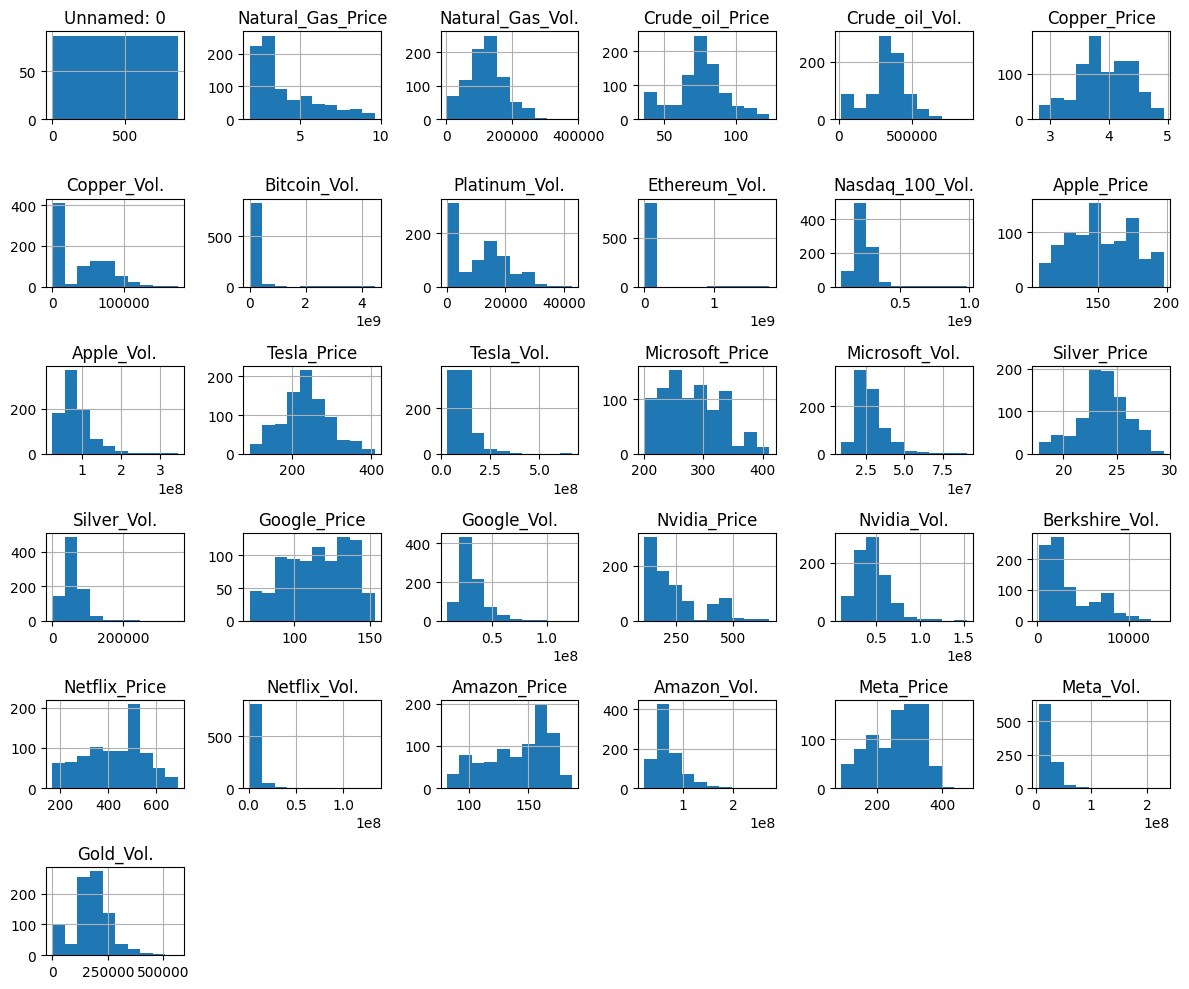

In [ ]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [ ]:
# data is from August 3rd 2020 to February 2nd 2024
numeric_data = data.copy()

In [ ]:
# Convert object columns to numeric
numeric_data['Bitcoin_Price'] = numeric_data['Bitcoin_Price'].str.replace(',', '').astype(float)
numeric_data['Platinum_Price'] = numeric_data['Platinum_Price'].str.replace(',', '').astype(float)
numeric_data['Ethereum_Price'] = numeric_data['Ethereum_Price'].str.replace(',', '').astype(float)
numeric_data['S&P_500_Price'] = numeric_data['S&P_500_Price'].str.replace(',', '').astype(float)
numeric_data['Nasdaq_100_Price'] = numeric_data['Nasdaq_100_Price'].str.replace(',', '').astype(float)
numeric_data['Berkshire_Price'] = numeric_data['Berkshire_Price'].str.replace(',', '').astype(float)
numeric_data['Gold_Price'] = numeric_data['Gold_Price'].str.replace(',', '').astype(float)

# Drop the 'Date' column
numeric_data.drop('Date', axis=1, inplace=True)

In [ ]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 868 entries, 0 to 867
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         868 non-null    int64  
 1   Natural_Gas_Price  868 non-null    float64
 2   Natural_Gas_Vol.   868 non-null    float64
 3   Crude_oil_Price    868 non-null    float64
 4   Crude_oil_Vol.     868 non-null    float64
 5   Copper_Price       868 non-null    float64
 6   Copper_Vol.        868 non-null    float64
 7   Bitcoin_Price      868 non-null    float64
 8   Bitcoin_Vol.       868 non-null    float64
 9   Platinum_Price     868 non-null    float64
 10  Platinum_Vol.      868 non-null    float64
 11  Ethereum_Price     868 non-null    float64
 12  Ethereum_Vol.      868 non-null    float64
 13  S&P_500_Price      868 non-null    float64
 14  Nasdaq_100_Price   868 non-null    float64
 15  Nasdaq_100_Vol.    868 non-null    float64
 16  Apple_Price        868 non-null

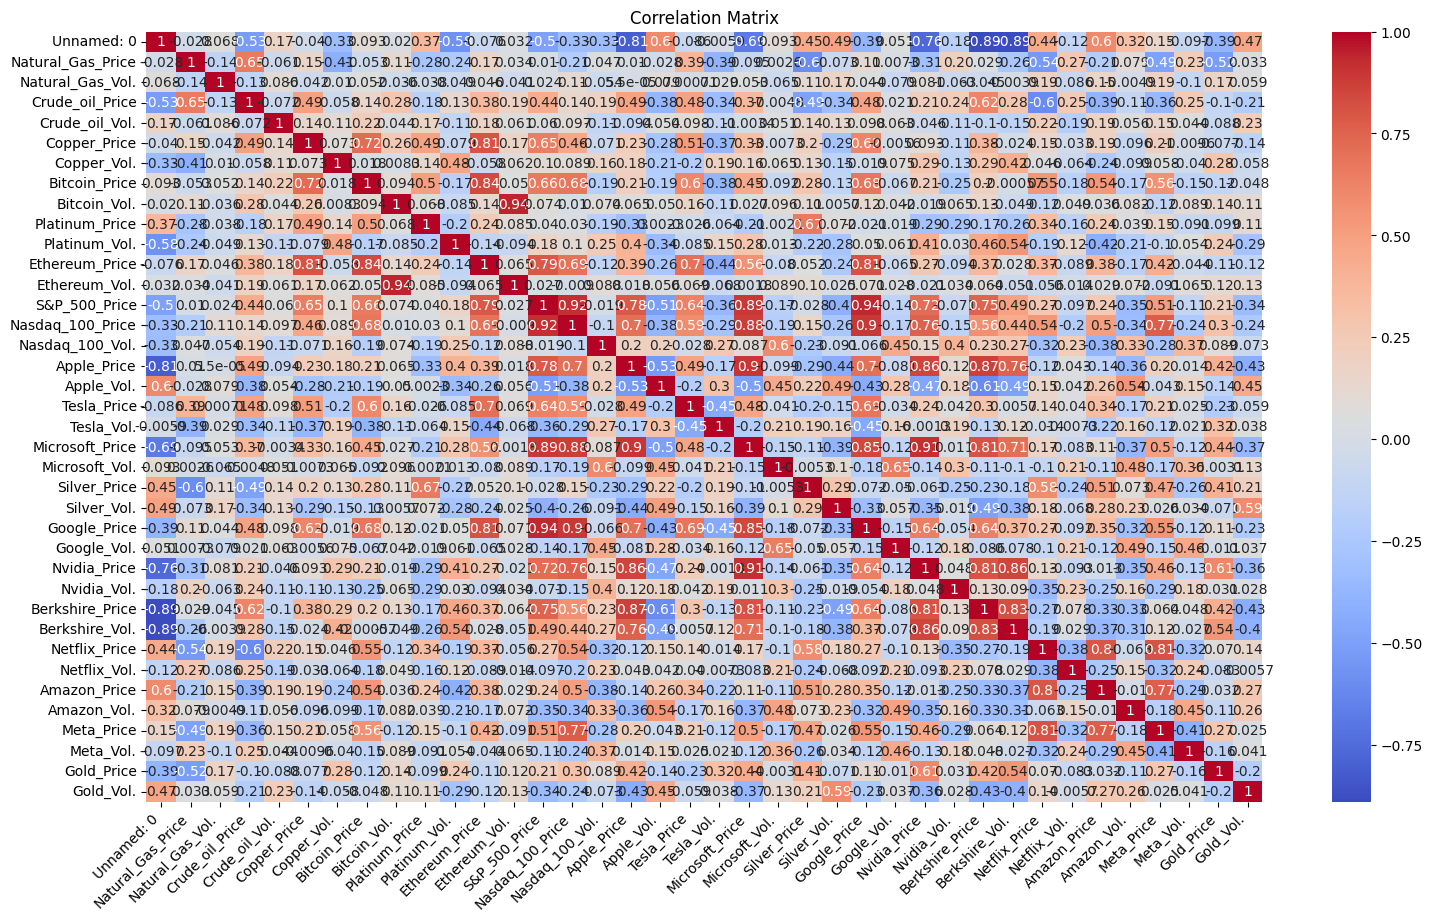

In [ ]:
# Correlation matrix
corr_matrix = numeric_data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

1. The 'Unnamed' column represents numerical values arranged in reverse chronological order. Upon examining this column alongside others, it appears that the 'Apple_Price,' 'Nvidia_Price,' 'Berkshire_Price,' and 'Berkshire_Vol' columns exhibit a strong negative correlation. This suggests that over time, the prices of Apple, Nvidia, and Berkshire stocks tend to rise, accompanied by an increase in Berkshire's trading volume.
2. Interesting observations:
Ethereum price is strongly correlated to copper price and bitcoin price.
Ethereum volume is strongly correlated to bitcoin volume.
...

In [ ]:
threshold = 0.70

high_corr_dict = {}

for column in corr_matrix.columns:
    high_corr_rows = corr_matrix[column][corr_matrix[column] >= threshold]
    high_corr_rows = high_corr_rows.drop(column, errors='ignore')
    if not high_corr_rows.empty:
        high_corr_dict[column] = high_corr_rows.index.tolist()

print(high_corr_dict)

{'Copper_Price': ['Bitcoin_Price', 'Ethereum_Price'], 'Bitcoin_Price': ['Copper_Price', 'Ethereum_Price'], 'Bitcoin_Vol.': ['Ethereum_Vol.'], 'Ethereum_Price': ['Copper_Price', 'Bitcoin_Price', 'S&P_500_Price', 'Tesla_Price', 'Google_Price'], 'Ethereum_Vol.': ['Bitcoin_Vol.'], 'S&P_500_Price': ['Ethereum_Price', 'Nasdaq_100_Price', 'Apple_Price', 'Microsoft_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price'], 'Nasdaq_100_Price': ['S&P_500_Price', 'Microsoft_Price', 'Google_Price', 'Nvidia_Price', 'Meta_Price'], 'Apple_Price': ['S&P_500_Price', 'Microsoft_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Berkshire_Vol.'], 'Tesla_Price': ['Ethereum_Price'], 'Microsoft_Price': ['S&P_500_Price', 'Nasdaq_100_Price', 'Apple_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Berkshire_Vol.'], 'Google_Price': ['Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price', 'Apple_Price', 'Microsoft_Price'], 'Nvidia_Price': ['S&P_500_Price', 'Nasdaq_100_Price', 'Apple_Price', '

# List of assets with strong positive correlations
1. Copper_Price: [Bitcoin_Price, Ethereum_Price],
2. Bitcoin_Price: [Copper_Price, Ethereum_Price],
3. Bitcoin_Vol.: [Ethereum_Vol.],
4. Ethereum_Price: [Copper_Price, Bitcoin_Price, S&P_500_Price, Tesla_Price, Google_Price],
5. Ethereum_Vol.: [Bitcoin_Vol.],
6. S&P_500_Price: [Ethereum_Price, Nasdaq_100_Price, Apple_Price, Microsoft_Price, Google_Price, Nvidia_Price, Berkshire_Price],
7. Nasdaq_100_Price: [S&P_500_Price, Microsoft_Price, Google_Price, Nvidia_Price, Meta_Price],
8. Apple_Price: [S&P_500_Price, Microsoft_Price, Google_Price, Nvidia_Price, Berkshire_Price, Berkshire_Vol.],
9. Tesla_Price: [Ethereum_Price],
10. Microsoft_Price: [S&P_500_Price, Nasdaq_100_Price, Apple_Price, Google_Price, Nvidia_Price, Berkshire_Price, Berkshire_Vol.],
11. Google_Price: [Ethereum_Price, S&P_500_Price, Nasdaq_100_Price, Apple_Price, Microsoft_Price],
12. Nvidia_Price: [S&P_500_Price, Nasdaq_100_Price, Apple_Price, Microsoft_Price, Berkshire_Price, Berkshire_Vol.],
13. Berkshire_Price: [S&P_500_Price, Apple_Price, Microsoft_Price, Nvidia_Price, Berkshire_Vol.],
14. Berkshire_Vol.: [Apple_Price, Microsoft_Price, Nvidia_Price, Berkshire_Price],
15. Netflix_Price: [Amazon_Price, Meta_Price],
16. Amazon_Price: [Netflix_Price, Meta_Price],
17. Meta_Price: [Nasdaq_100_Price, Netflix_Price, Amazon_Price]

In [ ]:
min_threshold = 0.5
max_threshold = 0.7

moderate_corr_dict = {}

for column in corr_matrix.columns:
    moderate_corr_rows = corr_matrix[column][(corr_matrix[column] >= min_threshold) & (corr_matrix[column] <= max_threshold)]
    moderate_corr_rows = moderate_corr_rows.drop(column, errors='ignore')
    if not moderate_corr_rows.empty:
        moderate_corr_dict[column] = moderate_corr_rows.index.tolist()

print(moderate_corr_dict)

{'Unnamed: 0': ['Apple_Vol.', 'Amazon_Price'], 'Natural_Gas_Price': ['Crude_oil_Price'], 'Crude_oil_Price': ['Natural_Gas_Price', 'Berkshire_Price'], 'Copper_Price': ['S&P_500_Price', 'Tesla_Price', 'Google_Price'], 'Bitcoin_Price': ['Platinum_Price', 'S&P_500_Price', 'Nasdaq_100_Price', 'Tesla_Price', 'Google_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price'], 'Platinum_Price': ['Bitcoin_Price', 'Silver_Price'], 'Platinum_Vol.': ['Berkshire_Vol.'], 'Ethereum_Price': ['Nasdaq_100_Price', 'Microsoft_Price'], 'S&P_500_Price': ['Copper_Price', 'Bitcoin_Price', 'Tesla_Price', 'Meta_Price'], 'Nasdaq_100_Price': ['Bitcoin_Price', 'Ethereum_Price', 'Apple_Price', 'Tesla_Price', 'Berkshire_Price', 'Netflix_Price', 'Amazon_Price'], 'Nasdaq_100_Vol.': ['Microsoft_Vol.'], 'Apple_Price': ['Nasdaq_100_Price'], 'Apple_Vol.': ['Unnamed: 0', 'Amazon_Vol.'], 'Tesla_Price': ['Copper_Price', 'Bitcoin_Price', 'S&P_500_Price', 'Nasdaq_100_Price', 'Google_Price'], 'Microsoft_Price': ['Ethereum_Price'], 

# List of assets with moderate positive correlations
1. Unnamed: 0: [Apple_Vol., Amazon_Price],
2. Natural_Gas_Price: [Crude_oil_Price],
3. Crude_oil_Price: [Natural_Gas_Price, Berkshire_Price],
4. Copper_Price: [S&P_500_Price, Tesla_Price, Google_Price],
5. Bitcoin_Price: [Platinum_Price, S&P_500_Price, Nasdaq_100_Price, Tesla_Price, Google_Price, Netflix_Price, Amazon_Price, Meta_Price],
6. Platinum_Price: [Bitcoin_Price, Silver_Price],
7. Platinum_Vol.: [Berkshire_Vol.],
8. Ethereum_Price: [Nasdaq_100_Price, Microsoft_Price],
9. S&P_500_Price: [Copper_Price, Bitcoin_Price, Tesla_Price, Meta_Price],
10. Nasdaq_100_Price: [Bitcoin_Price, Ethereum_Price, Apple_Price, Tesla_Price, Berkshire_Price, Netflix_Price, Amazon_Price],
11. Nasdaq_100_Vol.: [Microsoft_Vol.],
12. Apple_Price: [Nasdaq_100_Price],
13. Apple_Vol.: [Unnamed: 0, Amazon_Vol.],
14. Tesla_Price: [Copper_Price, Bitcoin_Price, S&P_500_Price, Nasdaq_100_Price, Google_Price],
15. Microsoft_Price: [Ethereum_Price],
16. Microsoft_Vol.: [Nasdaq_100_Vol., Google_Vol.],
17. Silver_Price: [Platinum_Price, Netflix_Price, Amazon_Price],
18. Silver_Vol.: [Gold_Vol.],
19. Google_Price: [Copper_Price, Bitcoin_Price, Tesla_Price, Nvidia_Price, Berkshire_Price, Meta_Price],
20. Google_Vol.: [Microsoft_Vol.],
21. Nvidia_Price: [Google_Price, Gold_Price],
22. Berkshire_Price: [Crude_oil_Price, Nasdaq_100_Price, Google_Price],
23. Berkshire_Vol.: [Platinum_Vol., Gold_Price],
24. Netflix_Price: [Bitcoin_Price, Nasdaq_100_Price, Silver_Price],
25. Amazon_Price: [Unnamed: 0, Bitcoin_Price, Nasdaq_100_Price, Silver_Price],
26. Amazon_Vol.: [Apple_Vol.],
27. Meta_Price: [Bitcoin_Price, S&P_500_Price, Google_Price],
28. Gold_Price: [Nvidia_Price, Berkshire_Vol.],
29. Gold_Vol.: [Silver_Vol.]

#DATA PRE-PROCESSING

1. removed the rows that had null data
2. converted object values to numeric values (since some columns had comma)

#MODELING(REGRESSION)

##Experiment 1
- Predicting the 'A' feature using all other columns except for 'A' itself, exactly as they are.

In [ ]:
feature_columns = numeric_data.columns[1:]

In [ ]:
feature_columns

Index(['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

In [ ]:
prediction_results = []

In [ ]:
# Iterate over each feature column
for feature in feature_columns:
    # Exclude the current feature from the list of features
    features_to_use = [col for col in feature_columns if col != feature]

    # Prepare the data
    X = numeric_data[features_to_use]
    y = numeric_data[feature]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the linear regression model
    model1 = LinearRegression()
    model1.fit(X_train, y_train)

    # Make predictions
    y_pred = model1.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r_squared = r2_score(y_test, y_pred)

    prediction_results.append({
        'Feature': feature,
        'MSE': '{:.2f}'.format(mse),
        'RMSE': '{:.2f}'.format(rmse),
        'R-Squared': '{:.2f}'.format(r_squared)
    })

    # print(f"# Prediction of : {feature}")
    # print(f"\tCoefficients: {model1.coef_}") # The coefficients
    # print("\tMean squared error (MSE): %.2f" % mse) # The mean squared error
    # print("\tRoot Mean squared error (RMSE): %.2f" % rmse) # The root mean squared error meanint that the predicted prices deviate from the actual prices
    # print("\tCoefficient of determination (R-squared): %.2f" % r_squared) # The coefficient of determination: 1 is perfect prediction
    # print("----------------------------\n")

prediction_df = pd.DataFrame(prediction_results)

In [ ]:
prediction_df

,Feature,MSE,RMSE,R-Squared
0,Natural_Gas_Price,0.52,0.72,0.87
1,Natural_Gas_Vol.,3005777333.20,54824.97,0.02
2,Crude_oil_Price,18.82,4.34,0.94
3,Crude_oil_Vol.,16179747250.55,127199.64,0.11
4,Copper_Price,0.01,0.11,0.94
5,Copper_Vol.,744964950.45,27294.05,0.50
6,Bitcoin_Price,13657100.50,3695.55,0.93
7,Bitcoin_Vol.,15422664070464382.00,124188019.03,0.85
8,Platinum_Price,1160.51,34.07,0.87
9,Platinum_Vol.,41845243.04,6468.79,0.53


##Experiment 2

In [ ]:
numeric_data_modified = numeric_data.copy()
# Dropping S&P_500_Price since it doesn't have volume data
numeric_data_modified.drop(columns=['S&P_500_Price'], inplace=True)

features_price = []
features_volume = []
features = []

for column in numeric_data_modified.columns:
    if column.endswith('_Price'):
        features_price.append(column)
        feature_name = column.replace('_Price', '')
        features.append(feature_name)
    elif column.endswith('_Vol.'):
        features_volume.append(column)

print("Number of features:", len(features))
print("Features:", features)
print("Features ending with '_Price':", features_price)
print("Features ending with '_Vol.':", features_volume)

Number of features: 18
Features: ['Natural_Gas', 'Crude_oil', 'Copper', 'Bitcoin', 'Platinum', 'Ethereum', 'Nasdaq_100', 'Apple', 'Tesla', 'Microsoft', 'Silver', 'Google', 'Nvidia', 'Berkshire', 'Netflix', 'Amazon', 'Meta', 'Gold']
Features ending with '_Price': ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'Nasdaq_100_Price', 'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price', 'Gold_Price']
Features ending with '_Vol.': ['Natural_Gas_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Bitcoin_Vol.', 'Platinum_Vol.', 'Ethereum_Vol.', 'Nasdaq_100_Vol.', 'Apple_Vol.', 'Tesla_Vol.', 'Microsoft_Vol.', 'Silver_Vol.', 'Google_Vol.', 'Nvidia_Vol.', 'Berkshire_Vol.', 'Netflix_Vol.', 'Amazon_Vol.', 'Meta_Vol.', 'Gold_Vol.']


In [ ]:
# Feature Engineering - Experiment 2

# Type in column names for price and volume here for the asset you want to predict, will allow us to dynamically apply features to whichever column we are predicting
for i in range(len(features_price)):
    feature_name = features[i]
    price_column = features_price[i]
    volume_column = features_volume[i]

    # Daily percentage price change/volume change. Price change, volume, and volume change will be features to use along with the others created to predict asset price
    numeric_data_modified[f'{feature_name}_Price Change'] = numeric_data_modified[price_column].pct_change() * 100
    numeric_data_modified[f'{feature_name}_Volume Change'] = numeric_data_modified[volume_column].pct_change() * 100

    # Define SMA_50, SMA_200, and Relative Strength index for selected price column
    numeric_data_modified[f'{feature_name}_SMA_50'] = numeric_data_modified[price_column].rolling(window=50).mean()
    numeric_data_modified[f'{feature_name}_SMA_200'] = numeric_data_modified[price_column].rolling(window=200).mean()
    numeric_data_modified[f'{feature_name}_RSI'] = talib.RSI(numeric_data_modified[price_column].values, timeperiod=14) # Talib install/import is at initial setup

    # numeric_data_modified.drop(columns=[price_column], inplace=True)
    # numeric_data_modified.drop(columns=[volume_column], inplace=True)


50-day Simple Moving Average (SMA): The 50-day SMA is a technical indicator that calculates the average closing price of a security over the last 50 trading days. It is used to identify the underlying trend of the security. When the current price is above the 50-day SMA, it is considered bullish, indicating a potential uptrend. Conversely, when the current price is below the 50-day SMA, it is considered bearish, indicating a potential downtrend.

200-day Simple Moving Average (SMA): Similar to the 50-day SMA, the 200-day SMA calculates the average closing price of a security over the last 200 trading days. It is also used to identify the long-term trend of the security. A security trading above its 200-day SMA is considered to be in a long-term uptrend, while a security trading below its 200-day SMA is considered to be in a long-term downtrend.

Relative Strength Index (RSI): The RSI is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100 and is typically used to identify overbought or oversold conditions in a security. A security is considered overbought when the RSI is above 70, indicating that it may be due for a price correction. Conversely, a security is considered oversold when the RSI is below 30, indicating that it may be due for a price rebound.

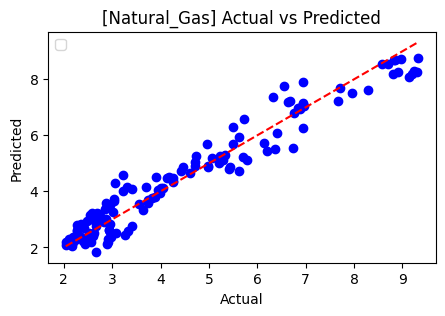

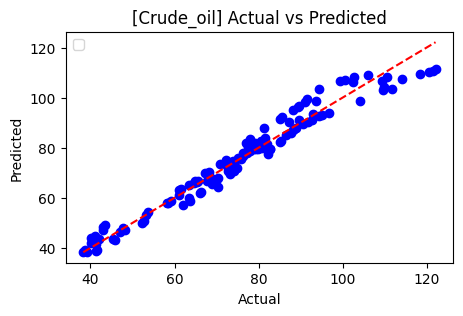

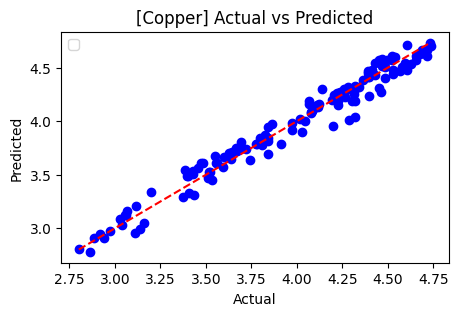

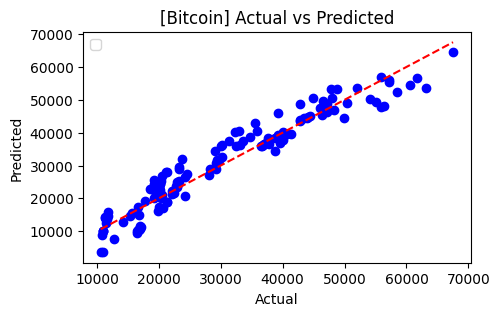

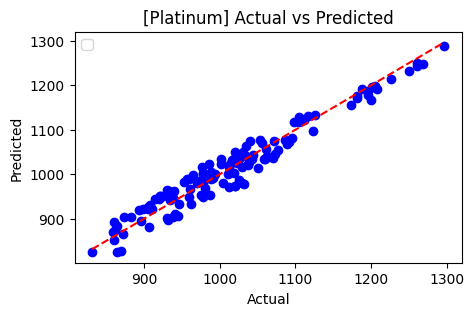

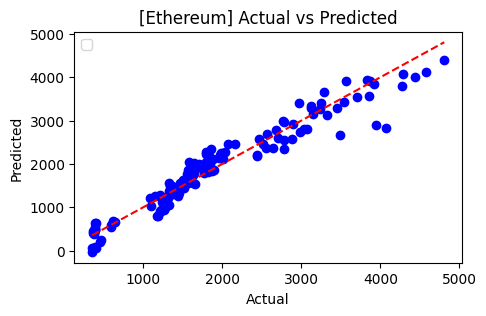

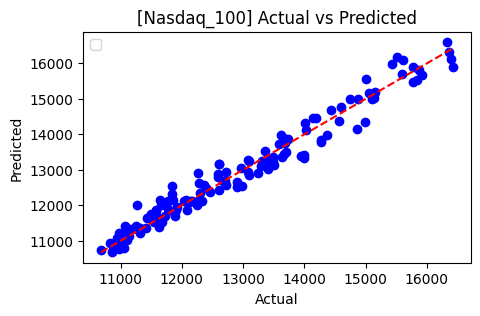

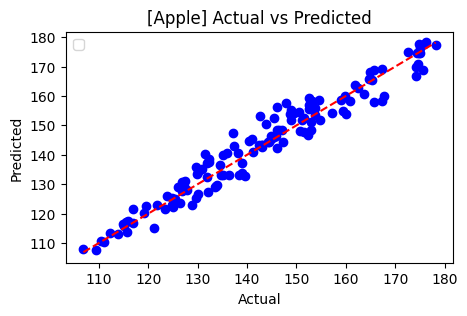

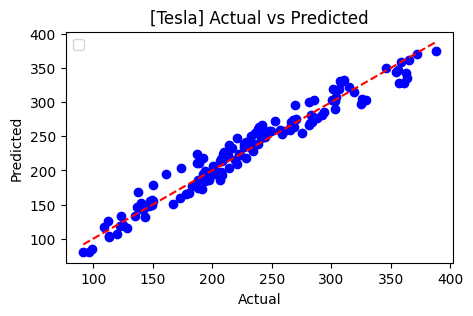

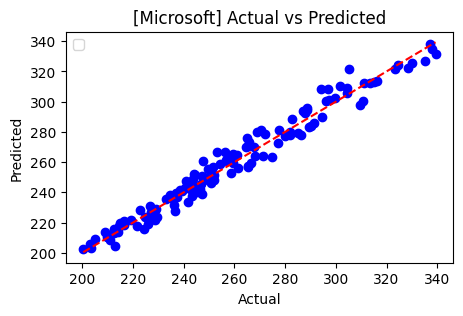

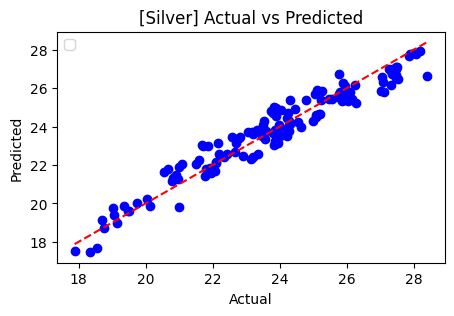

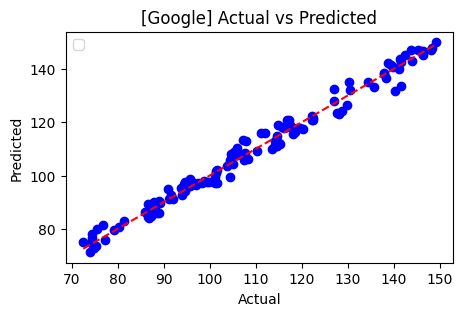

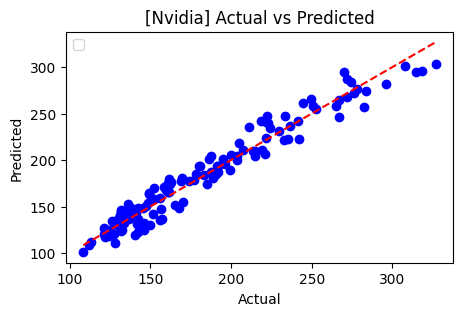

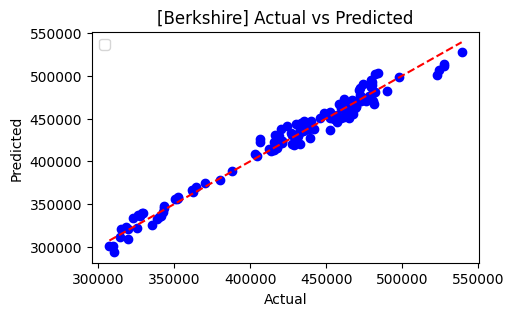

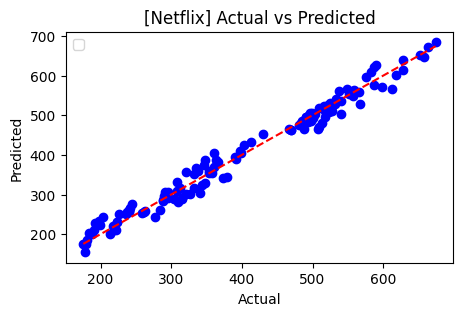

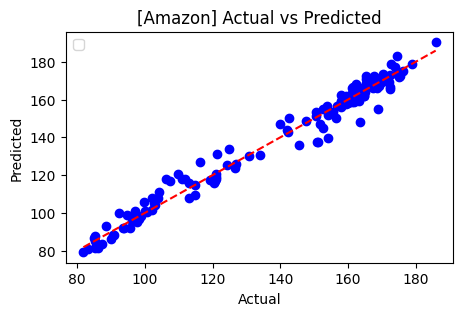

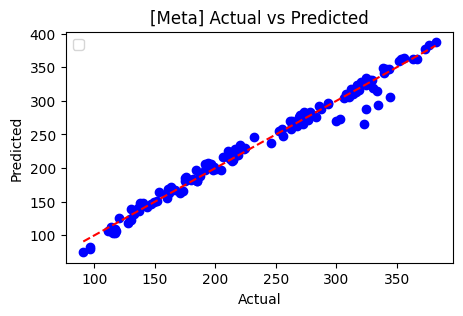

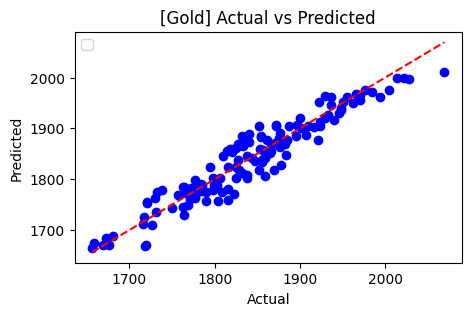

In [ ]:
numeric_data_modified = numeric_data_modified.dropna()
prediction_results2 = []

for feature in features:
    feature_name = feature

    # Define features and target variable
    X = numeric_data_modified[[f'{feature_name}_Price Change', f'{feature_name}_Volume Change', f'{feature_name}_SMA_50', f'{feature_name}_SMA_200', f'{feature_name}_RSI']]
    y = numeric_data_modified[f'{feature_name}_Price']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Replace infinite values with NaN - since Platinum_Volume Change has inf value
    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    y_train.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with NaN values
    X_train.dropna(inplace=True)
    y_train = y_train[X_train.index]  # Remove corresponding rows in y_train

    # Initialize the Linear Regression model
    model2 = LinearRegression()

    # Train the model
    model2.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model2.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r_squared = r2_score(y_test, y_pred)

    prediction_results2.append({
        'Feature': feature_name,
        'MSE': '{:.2f}'.format(mse),
        'RMSE': '{:.2f}'.format(rmse),
        'R-Squared': '{:.2f}'.format(r_squared)
    })
    # print(f'Mean Squared Error: {mse}')
    # print(f'R^2 Score: {r_squared}')

    # Plotting the actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'[{feature_name}] Actual vs Predicted')
    plt.legend()
    plt.show()

    # Create a DataFrame to store actual and predicted values
    # results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
    # results.head(25)

prediction_df2 = pd.DataFrame(prediction_results2)

In [ ]:
# Check for missing values
# print("Missing values in X_train:", X_train.isnull().sum())
# print("Missing values in y_train:", y_train.isnull().sum())

# Check for extremely large values
# print("Maximum value in X_train:", X_train.max())
# print("Minimum value in X_train:", X_train.min())
# print("Maximum value in y_train:", y_train.max())
# print("Minimum value in y_train:", y_train.min())

Missing values in X_train: Platinum_Price Change     0
Platinum_Volume Change    0
Platinum_SMA_50           0
Platinum_SMA_200          0
Platinum_RSI              0
dtype: int64
Missing values in y_train: 0
Maximum value in X_train: Platinum_Price Change        8.195638
Platinum_Volume Change            inf
Platinum_SMA_50           1212.476000
Platinum_SMA_200          1117.824500
Platinum_RSI                75.647871
dtype: float64
Minimum value in X_train: Platinum_Price Change      -6.203812
Platinum_Volume Change   -100.000000
Platinum_SMA_50           879.384000
Platinum_SMA_200          944.151750
Platinum_RSI               25.849665
dtype: float64
Maximum value in y_train: 1286.4
Minimum value in y_train: 810.1


In [ ]:
prediction_df2

,Feature,MSE,RMSE,R-Squared
0,Natural_Gas,0.26,0.51,0.94
1,Crude_oil,14.19,3.77,0.97
2,Copper,0.01,0.09,0.97
3,Bitcoin,15723064.43,3965.23,0.92
4,Platinum,517.01,22.74,0.95
5,Ethereum,76015.55,275.71,0.93
6,Nasdaq_100,84610.89,290.88,0.96
7,Apple,16.02,4.00,0.95
8,Tesla,211.39,14.54,0.96
9,Microsoft,33.10,5.75,0.97


#EVALUATION

#CONCLUSION


In conclusion, the linear regression models constructed in both experiments show promising results in predicting asset prices. Experiment 1, focusing solely preditcing features using all available features within the dataset excluding itself, demonstrates decent performance with average MSE and RMSE values across various assets. Experiment 2, which includes volatility and price features in addition to features within the dataset,exhibits strong predictive power with low MSE and RMSE values. These findings suggest that linear regression can be a valuable tool for forecasting asset prices. However, to enhance the robustness of the models, further analysis, such as feature selection and validation, is recommended. Overall, these experiments highlight the potential of linear regression in predicting asset prices and underscore the importance of careful model construction and evaluation in financial forecasting.

#IMPACT

Predicting stock market prices offers numerous benefits, such as aiding investors in making informed decisions and managing risks effectively. However, excessive reliance on predictive models can lead to inaccurate forecasts and financial setbacks. Moreover, these models could be exploited by unscrupulous individuals to manipulate stock prices or trading volumes for personal gain. Additionally, there's a concern about algorithmic bias, where historical biases or inaccuracies in training data may perpetuate disparities in stock market predictions. Therefore, while predictions can offer valuable insights, it's crucial to view them as guidance rather than infallible indicators.

#REFERENCES

Github Repository Link: https://github.com/ccopenh1/3162-final-project


Dataset: https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data/data